In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

import deeplabcut

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [2]:
video_dir = '/Users/julianarhee/DeepLabCut/bandensis-dyad-jyr-2022-07-22/videos'
movname = 'NINJAV_S001_S001_T034_008_c'
video='%s.mp4' % movname
# DLCscorer='DeepCut_resnet50_openfieldOct30shuffle1_15001'
DLCscorer = 'DLC_dlcrnetms5_bandensis-dyadJul22shuffle1_50000_el'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
df0 = pd.read_hdf(os.path.join(video_dir, dataname))

In [3]:
results_fpath = os.path.join(video_dir, dataname)
df0.head()

scorer      DLC_dlcrnetms5_bandensis-dyadJul22shuffle1_50000            \
individuals                                            band1             
bodyparts                                            eyeLeft             
coords                                                     x         y   
0                                                   1898.992  1431.221   
1                                                   1898.695  1430.332   
2                                                   1900.264  1428.772   
3                                                   1899.108  1431.743   
4                                                   1899.029  1431.661   

scorer                                                                     \
individuals                                                                 
bodyparts               eyeRight                        armbase             
coords      likelihood         x         y likelihood         x         y   
0                  1.0  1818.043  1389.937        1.0  1832.508  1447.895   
1                  1.0  1818.514  1389.541        1.0  1832.644  1449.159   
2                  1.0  1818.981  1389.694        1.0  1832.957  1447.819   
3                  1.0  1820.224  1389.394        1.0  1833.909  1447.091   
4                  1.0  1821.120  1390.165        1.0  1833.023  1447.145   

scorer                            ...                                 \
individuals                       ...      band2                       
bodyparts                mantleA  ...   mantleL3  mantleR1             
coords      likelihood         x  ... likelihood         x         y   
0                  1.0  1864.846  ...        1.0  1567.153  1528.726   
1                  1.0  1864.713  ...        1.0  1567.388  1527.659   
2                  1.0  1865.864  ...        1.0  1566.389  1527.694   
3                  1.0  1865.557  ...        1.0  1567.405  1528.046   
4                  1.0  1866.494  ...        1.0  1567.825  1529.554   

scorer                                                                     \
individuals                                                                 
bodyparts               mantleR2                       mantleR3             
coords      likelihood         x         y likelihood         x         y   
0                  1.0  1543.264  1474.542        1.0  1552.050  1421.985   
1                  1.0  1543.032  1473.764        1.0  1552.512  1419.616   
2                  1.0  1543.364  1473.369        1.0  1552.949  1420.419   
3                  1.0  1543.007  1473.554        1.0  1553.208  1420.777   
4                  1.0  1542.006  1472.979        1.0  1552.632  1419.548   

scorer                  
individuals             
bodyparts               
coords      likelihood  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  

[5 rows x 66 columns]

In [4]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,ix='band1',
                    alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][ix][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][ix][bp]['x'].values[Index],Dataframe[scorer][ix][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][ix][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][ix][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][ix][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][ix][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][ix][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][ix][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][ix][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][ix][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][ix][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))


In [5]:
scorer = df0.columns.get_level_values(0)[0]
scorer

'DLC_dlcrnetms5_bandensis-dyadJul22shuffle1_50000'

In [6]:
df0[scorer]['band1']['eyeLeft'].head()

coords         x         y  likelihood
0       1898.992  1431.221         1.0
1       1898.695  1430.332         1.0
2       1900.264  1428.772         1.0
3       1899.108  1431.743         1.0
4       1899.029  1431.661         1.0

In [7]:
## Some default plotting

In [8]:
# bodyparts=df0.columns.get_level_values(2) #you can read out the header to get body part names!

# bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

# %matplotlib inline
# PlottingResults(df0,bodyparts2plot,ix='band1', alphavalue=.2,pcutoff=.5,fs=(8,4))

In [9]:
%matplotlib notebook

## get body parts

In [10]:
from deeplabcut.utils import auxiliaryfunctions
from deeplabcut.utils.video_processor import (
    VideoProcessorCV as vp,)  # used to CreateVideo

In [11]:
config_path = '/Users/julianarhee/DeepLabCut/bandensis-dyad-jyr-2022-07-22/config.yaml'
cfg = auxiliaryfunctions.read_config(config_path)

In [12]:
bodyparts2connect = cfg['skeleton']
bodyparts2connect

[['armbase', 'eyeLeft'], ['armbase', 'eyeRight'], ['eyeLeft', 'eyeRight'], ['armbase', 'mantleA'], ['mantleA', 'mantleP'], ['mantleA', 'mantleL1'], ['mantleL1', 'mantleL2'], ['mantleL2', 'mantleL3'], ['mantleL3', 'mantleP'], ['mantleP', 'mantleR3'], ['mantleR3', 'mantleR2'], ['mantleR2', 'mantleR1'], ['mantleR1', 'mantleA'], ['mantleL2', 'mantleR2']]

In [13]:
video_fpath  = results_fpath.replace('%s_el.h5' % scorer, '.mp4')

# Create skeleton video

In [14]:
from matplotlib.collections import LineCollection
from matplotlib.animation import FFMpegWriter
from tqdm import trange

def get_segment_indices(bodyparts2connect, all_bpts):
    bpts2connect = []
    for bpt1, bpt2 in bodyparts2connect:
        if bpt1 in all_bpts and bpt2 in all_bpts:
            bpts2connect.extend(
                zip(
                    *(
                        np.flatnonzero(all_bpts == bpt1),
                        np.flatnonzero(all_bpts == bpt2),
                    )
                )
            )
    return bpts2connect

def create_video_with_keypoints_only(
    df,
    output_name,
    ind_links=None,
    pcutoff=0.6,
    dotsize=8,
    alpha=0.7,
    background_color="k",
    skeleton_color=["navy"],
    color_by="bodypart",
    colormap="viridis",
    fps=25,
    dpi=200,
    codec="h264",
):
    bodyparts = df.columns.get_level_values("bodyparts")[::3]
    bodypart_names = bodyparts.unique()
    n_bodyparts = len(bodypart_names)
    nx = int(np.nanmax(df.xs("x", axis=1, level="coords")))
    ny = int(np.nanmax(df.xs("y", axis=1, level="coords")))

    n_frames = df.shape[0]
    xyp = df.values.reshape((n_frames, -1, 3))

    if color_by == "bodypart":
        map_ = bodyparts.map(dict(zip(bodypart_names, range(n_bodyparts))))
        cmap = plt.get_cmap(colormap, n_bodyparts)
    elif color_by == "individual":
        try:
            individuals = df.columns.get_level_values("individuals")[::3]
            individual_names = individuals.unique().to_list()
            n_individuals = len(individual_names)
            map_ = individuals.map(dict(zip(individual_names, range(n_individuals))))
            cmap = plt.get_cmap(colormap, n_individuals)
        except KeyError as e:
            raise Exception(
                "Coloring by individuals is only valid for multi-animal data"
            ) from e
    else:
        raise ValueError(f"Invalid color_by={color_by}")

    prev_backend = plt.get_backend()
    plt.switch_backend("agg")
    fig = plt.figure(frameon=False, figsize=(nx / dpi, ny / dpi))
    ax = fig.add_subplot(111)
    scat = ax.scatter([], [], s=dotsize ** 2, alpha=alpha)
    coords = xyp[0, :, :2]
    coords[xyp[0, :, 2] < pcutoff] = np.nan
    scat.set_offsets(coords)
    colors = cmap(map_)
    scat.set_color(colors)
    segs = coords[tuple(zip(*tuple(ind_links))), :].swapaxes(0, 1) if ind_links else []
    coll = LineCollection(segs, colors=skeleton_color, alpha=alpha)
    ax.add_collection(coll)
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)
    ax.axis("off")
    ax.add_patch(
        plt.Rectangle(
            (0, 0), 1, 1, facecolor=background_color, transform=ax.transAxes, zorder=-1
        )
    )
    ax.invert_yaxis()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    writer = FFMpegWriter(fps=fps, codec=codec)
    with writer.saving(fig, output_name, dpi=dpi):
        writer.grab_frame()
        for index, _ in enumerate(trange(n_frames - 1), start=1):
            coords = xyp[index, :, :2]
            coords[xyp[index, :, 2] < pcutoff] = np.nan
            scat.set_offsets(coords)
            if ind_links:
                segs = coords[tuple(zip(*tuple(ind_links))), :].swapaxes(0, 1)
            coll.set_segments(segs)
            writer.grab_frame()
    plt.close(fig)
    plt.switch_backend(prev_backend)



In [15]:
videooutname = os.path.join(video_dir, 'test_line.mp4')

skeleton_colors = ['c', 'm']
color_by = "individual"
outputframerate = 30*4
df = df0.copy()
keypoint_cmap = 'cool' #cfg["colormpa"]
keypoint_size = 6 #cfg["dotsize"]

pcutoff = cfg["pcutoff"]

In [16]:
df = df0.iloc[7000:8000].copy()
print(bodyparts2connect)
bodyparts = df.columns.get_level_values("bodyparts")[::3]

mask = df.columns.get_level_values("bodyparts").isin(bodyparts)
df.loc[:, ~mask] = np.nan
inds = None
if bodyparts2connect:
    all_bpts = df.columns.get_level_values("bodyparts")[::3]
    inds = get_segment_indices(bodyparts2connect, all_bpts)
clip = vp(fname=video_fpath, fps=outputframerate)
create_video_with_keypoints_only(
    df,
    videooutname,
    inds,
    cfg["pcutoff"],
    keypoint_size,
    cfg["alphavalue"],
    skeleton_color=skeleton_colors,
    color_by=color_by,
    colormap=keypoint_cmap,
    fps=clip.fps(),
)
clip.close()

[['armbase', 'eyeLeft'], ['armbase', 'eyeRight'], ['eyeLeft', 'eyeRight'], ['armbase', 'mantleA'], ['mantleA', 'mantleP'], ['mantleA', 'mantleL1'], ['mantleL1', 'mantleL2'], ['mantleL2', 'mantleL3'], ['mantleL3', 'mantleP'], ['mantleP', 'mantleR3'], ['mantleR3', 'mantleR2'], ['mantleR2', 'mantleR1'], ['mantleR1', 'mantleA'], ['mantleL2', 'mantleR2']]


100%|████████████████████████████████████████| 999/999 [00:17<00:00, 56.93it/s]


In [18]:
videooutname = os.path.join(video_dir, 'test_centered.mp4')

In [19]:
df = df0.iloc[7000:8000].copy()
print(bodyparts2connect)
bodyparts = df.columns.get_level_values("bodyparts")[::3]
mask = df.columns.get_level_values("bodyparts").isin(bodyparts)
df.loc[:, ~mask] = np.nan
all_bpts = df.columns.get_level_values("bodyparts")[::3]
inds = get_segment_indices(bodyparts2connect, all_bpts)

[['armbase', 'eyeLeft'], ['armbase', 'eyeRight'], ['eyeLeft', 'eyeRight'], ['armbase', 'mantleA'], ['mantleA', 'mantleP'], ['mantleA', 'mantleL1'], ['mantleL1', 'mantleL2'], ['mantleL2', 'mantleL3'], ['mantleL3', 'mantleP'], ['mantleP', 'mantleR3'], ['mantleR3', 'mantleR2'], ['mantleR2', 'mantleR1'], ['mantleR1', 'mantleA'], ['mantleL2', 'mantleR2']]


## center 1 animal

In [88]:
# calculate center for AP/ML mantle axis
a = df[scorer]['band1']['mantleA'][['x', 'y']].values
p = df[scorer]['band1']['mantleP'][['x', 'y']].values

lt = df[scorer]['band1']['mantleL2'][['x', 'y']].values
rt = df[scorer]['band1']['mantleR2'][['x', 'y']].values

ctrs = np.array([line_intersection( (a_, p_), (lt_, rt_) ) \
                 for a_, p_, lt_, rt_ in zip(a, p, lt, rt)])
print(ctrs.shape)

all_bpts = df.columns.get_level_values("bodyparts")[::3][0:11]

(1000, 2)


In [89]:
ctr_dict = dict((k, {}) for k in all_bpts)
for bp in all_bpts:
    xv = df[scorer][animal][bp]['x'] - ctrs[:, 0]
    yv = df[scorer][animal][bp]['y'] - ctrs[:, 1]
    ctr_dict[bp]['x'] = xv
    ctr_dict[bp]['y'] = yv
# turn into dataframe
reform = {(outerKey, innerKey): values for outerKey, innerDict in ctr_dict.items() \
          for innerKey, values in innerDict.items()}
df_ctr = pd.DataFrame(reform)

# get coords
n_frames_ctr = df_ctr.shape[0]
xyp_ctr = df_ctr.values.reshape((n_frames_ctr, -1, 2)) #.shape
coords_ctr = xyp_ctr[0, :, :] # grab first coords

# get uncentered coords
n_frames = df.shape[0]
xyp = df.values.reshape((n_frames, -1, 3))
coords = xyp[0, :, :]
print(df.shape, df_ctr.shape)
print(coords.shape, coords_ctr.shape)

(1000, 66) (1000, 22)
(22, 3) (11, 2)


In [90]:
df_ctr.shape

(1000, 22)

In [91]:

ix =0 
v = (0, 1)
R, theta = get_2d_rotmat(ix, df_ctr, v=v)
R

1.461950930224994 83.76361815711685


array([ 0.1086306 , -0.99408219])

In [92]:
# get uncentered coords
n_frames = df_ctr.shape[0]
xyp_ctr = df_ctr.values.reshape((n_frames, -1, 2))
coords_ctr = xyp_ctr[0, :, :]

In [93]:

n_bodyparts = 11
xyp_ctr = df_ctr.values.reshape((n_frames, -1, 2))
coords_ctr = xyp_ctr[0, :, :]
# centered_coords = df_ctr.values.reshape((n_bodyparts, -1, 2))
R, theta = get_2d_rotmat(ix, df_ctr, v=v)
R.shape
rot_coords = coords_ctr.dot(R)


1.461950930224994 83.76361815711685


In [67]:
R

array([ 0.1086306 , -0.99408219])

In [ ]:
clip = vp(fname=video_fpath, fps=outputframerate)
create_video_with_keypoints_only(
    df,
    videooutname,
    inds,
    cfg["pcutoff"],
    keypoint_size,
    cfg["alphavalue"],
    skeleton_color=skeleton_colors,
    color_by=color_by,
    colormap=keypoint_cmap,
    fps=clip.fps(),
)
clip.close()

# align

In [220]:
df = df0.copy() #
# df = df0.iloc[7000:8000].copy()
print(bodyparts2connect)
bodyparts = df.columns.get_level_values("bodyparts")[::3]
bodyparts

[['mantleA', 'mantleR1'], ['mantleR1', 'mantleR2'], ['mantleR2', 'mantleR3'], ['mantleR3', 'mantleP'], ['mantleP', 'mantleL3'], ['mantleL3', 'mantleL2'], ['mantleL2', 'mantleL1'], ['mantleL1', 'mantleA']]


Index(['eyeLeft', 'eyeRight', 'armbase', 'mantleA', 'mantleP', 'mantleL1',
       'mantleL2', 'mantleL3', 'mantleR1', 'mantleR2', 'mantleR3', 'eyeLeft',
       'eyeRight', 'armbase', 'mantleA', 'mantleP', 'mantleL1', 'mantleL2',
       'mantleL3', 'mantleR1', 'mantleR2', 'mantleR3'],
      dtype='object', name='bodyparts')

In [221]:
#df = df0.copy() 
#df = df.iloc[7000:8000].copy()

In [222]:
#bodyparts2connect = [['mantleA', 'mantleP'], ['mantleL2', 'mantleR2']]
bodyparts2connect = [['mantleA', 'mantleR1'], ['mantleR1', 'mantleR2'],\
                     ['mantleR2', 'mantleR3'], ['mantleR3', 'mantleP'],\
                     ['mantleP', 'mantleL3'], ['mantleL3', 'mantleL2'],\
                     ['mantleL2', 'mantleL1'], ['mantleL1', 'mantleA']]
all_bpts = df.columns.get_level_values("bodyparts")[::3][0:11]
#all_bpts = df.columns.get_level_values("bodyparts")[::3]
inds = get_segment_indices(bodyparts2connect, all_bpts)
print(inds) # these are used to index into coords

[(3, 8), (8, 9), (9, 10), (10, 4), (4, 7), (7, 6), (6, 5), (5, 3)]


#### plot a frame

In [224]:

n_frames = df.shape[0]
print(n_frames)
xyp = df.values.reshape((n_frames, -1, 3))
print(xyp.shape)
# get coords
coords = xyp[0, :, :2] # grab first coord
coords[xyp[0, :, 2] < pcutoff] = np.nan
segs = coords[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []

8991
(8991, 22, 3)


In [225]:
nx = int(np.nanmax(df.xs("x", axis=1, level="coords")))
ny = int(np.nanmax(df.xs("y", axis=1, level="coords")))
dpi=200

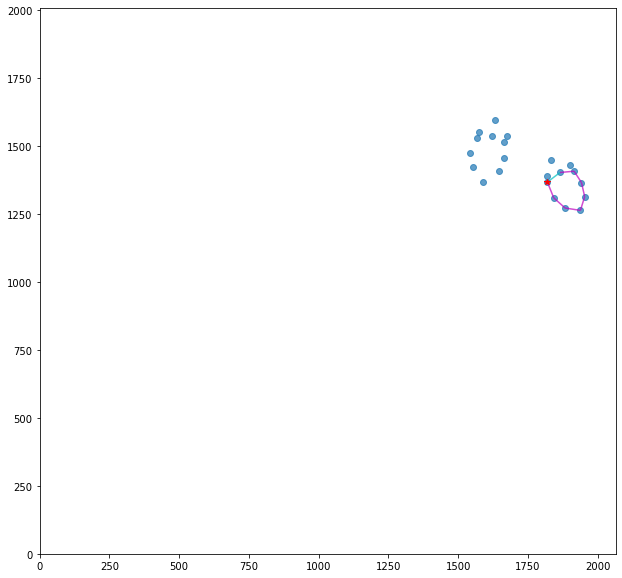

In [226]:
fig = plt.figure(frameon=False, figsize=(nx / dpi, ny / dpi))
ax = fig.add_subplot(111)
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
scat.set_offsets(coords)

coll = LineCollection(segs[0:1], colors=skeleton_colors[0], alpha=0.7)
col2 = LineCollection(segs[1:], colors=skeleton_colors[1], alpha=0.7)

ax.add_collection(coll)
ax.add_collection(col2)
ax.set_xlim(0, nx)
ax.set_ylim(0, ny)

ax.plot(segs[1:][0,:][0, 0], segs[1:][0,:][0, 1], 'r*')

In [24]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [25]:
# segs[b1_ix1] - line segment belonging to animal 1
# segs[b1_ix][0] - first point defining line segment^

def get_centroid(segs, animal='band1'):

    b1_ix1 = 0 if animal=='band1' else 1
    b1_ix2 = 2 if animal=='band1' else 3
    vec_ix = 0

    A=segs[b1_ix1][0,:]
    B=segs[b1_ix1][1,:]

    C=segs[b1_ix2][0,:]
    D=segs[b1_ix2][1,:]
    cx, cy = line_intersection((A, B), (C, D))

    return cx, cy

## center

In [250]:
animal = 'band1'
#df = df0.copy() #
df = df0.iloc[7000:8000].copy()
print(bodyparts2connect)
bodyparts = df.columns.get_level_values("bodyparts")[::3]
bodyparts

[['mantleA', 'mantleR1'], ['mantleR1', 'mantleR2'], ['mantleR2', 'mantleR3'], ['mantleR3', 'mantleP'], ['mantleP', 'mantleL3'], ['mantleL3', 'mantleL2'], ['mantleL2', 'mantleL1'], ['mantleL1', 'mantleA']]


Index(['eyeLeft', 'eyeRight', 'armbase', 'mantleA', 'mantleP', 'mantleL1',
       'mantleL2', 'mantleL3', 'mantleR1', 'mantleR2', 'mantleR3', 'eyeLeft',
       'eyeRight', 'armbase', 'mantleA', 'mantleP', 'mantleL1', 'mantleL2',
       'mantleL3', 'mantleR1', 'mantleR2', 'mantleR3'],
      dtype='object', name='bodyparts')

#### use mantle to get centroid

In [251]:
# segs[b1_ix1] - line segment belonging to animal 1
# segs[b1_ix][0] - first point defining line segment^

#df_single = df[scorer]['band1'].copy()
n_frames = df.shape[0]
xyp = df.values.reshape((n_frames, -1, 3))
print(n_frames, xyp.shape)
# get coords
coords = xyp[0, :, :2] # grab first coord
coords[xyp[0, :, 2] < pcutoff] = np.nan
segs = coords[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []

cx, cy = get_centroid(segs, animal=animal)
print(cx, cy)

1000 (1000, 22, 3)
891.3780418552036 628.405026941758


#### center all the coordinates


In [252]:
# calculate center for AP/ML mantle axis
a = df[scorer]['band1']['mantleA'][['x', 'y']].values
p = df[scorer]['band1']['mantleP'][['x', 'y']].values

lt = df[scorer]['band1']['mantleL2'][['x', 'y']].values
rt = df[scorer]['band1']['mantleR2'][['x', 'y']].values

ctrs = np.array([line_intersection( (a_, p_), (lt_, rt_) ) \
                 for a_, p_, lt_, rt_ in zip(a, p, lt, rt)])

In [253]:
all_bpts = df.columns.get_level_values("bodyparts")[::3][0:11]

ctr_dict = dict((k, {}) for k in all_bpts)
for bp in all_bpts:
    xv = df[scorer][animal][bp]['x'] - ctrs[:, 0]
    yv = df[scorer][animal][bp]['y'] - ctrs[:, 1]
    ctr_dict[bp]['x'] = xv
    ctr_dict[bp]['y'] = yv
# turn into dataframe
reform = {(outerKey, innerKey): values for outerKey, innerDict in ctr_dict.items() \
          for innerKey, values in innerDict.items()}
df_ctr = pd.DataFrame(reform)

# get coords
n_frames = df_ctr.shape[0]
print(df_ctr.shape, df.shape)
xyp_ctr = df_ctr.values.reshape((n_frames, -1, 2)) #.shape
print(xyp_ctr.shape, xyp.shape, df_ctr.shape)

(1000, 22) (1000, 66)
(1000, 11, 2) (1000, 22, 3) (1000, 22)


In [254]:
coords_ctr = xyp_ctr[0, :, :] # grab first coords
#coords_ctr[xyp_ctr[0, :, :] < pcutoff] = np.nan
coords_ctr.shape

(11, 2)

#### center Ap/Ml axis

In [255]:
u_a = df_ctr['mantleA'][['x', 'y']].values
u_p = df_ctr['mantleP'][['x', 'y']].values
centered_ap = np.array([u_a, u_p]).swapaxes(0, 1)
centered_ap.shape
# PRE centering to plot
u_a = df[scorer]['band1']['mantleA'][['x', 'y']].values
u_p = df[scorer]['band1']['mantleP'][['x', 'y']].values
uncentered_ap = np.array([u_a, u_p]).swapaxes(0, 1)
uncentered_ap.shape

(1000, 2, 2)

In [256]:
nf, nparts, d = xyp.shape
if animal=='band1':
    bodycoords = coords[0:int(nparts/2)]
else:
    bodycoords = coords[:int(nparts/2)]
colormap='jet'
#t_cmap = plt.get_cmap(colormap, df.shape[0], as_cmap=False)
n_frames_plot = uncentered_ap[::20].shape[0]
t_cmap = plt.cm.jet(np.linspace(0,1,n_frames_plot))

(-1003.5, 1003.5)

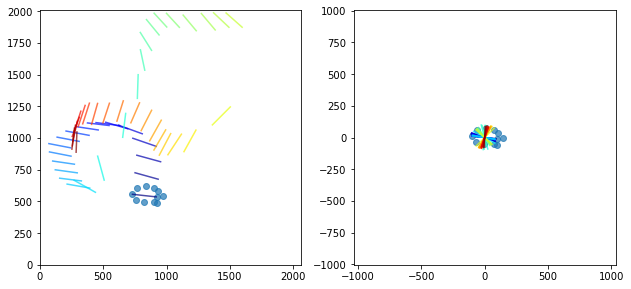

In [257]:
fig = plt.figure(frameon=False, figsize=(nx / dpi, ny / dpi))

ax = fig.add_subplot(121)
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
col0 = LineCollection( uncentered_ap[::20], colors=t_cmap, alpha=0.7)
#ax.add_collection(col0)
scat.set_offsets(coords[0:11])
ax.add_collection(col0)
ax.set_aspect('equal')

ax.set_xlim(0, nx)
ax.set_ylim(0, ny)

ax = fig.add_subplot(122)
#scat.set_offsets(coords)
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
#coll = LineCollection( centered_ap, colors=skeleton_colors[0], alpha=0.7)
coll = LineCollection( centered_ap[::20], colors=t_cmap, alpha=0.7)
scat.set_offsets(coords_ctr[0:11])

#col2 = LineCollection( sg_lr, colors=skeleton_colors[1], alpha=0.7)
ax.set_aspect('equal')
ax.add_collection(coll)
ax.set_xlim(-nx/2, nx/2)
ax.set_ylim(-ny/2, ny/2)

In [32]:
# def rotation_matrix_from_vectors(vec1, vec2):
#     """ Find the rotation matrix that aligns vec1 to vec2
#     :param vec1: A 3d "source" vector
#     :param vec2: A 3d "destination" vector
#     :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
#     """
#     a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
#     v = np.cross(a, b)
#     c = np.dot(a, b)
#     s = np.linalg.norm(v)
#     kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
#     rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
#     return rotation_matrix

def align_vectors(a, b):
    b = b / np.linalg.norm(b) # normalize a
    a = a / np.linalg.norm(a) # normalize b
    v = np.cross(a, b)
    # s = np.linalg.norm(v)
    c = np.dot(a, b)

    v1, v2, v3 = v
    h = 1 / (1 + c)

    Vmat = np.array([[0, -v3, v2],
                  [v3, 0, -v1],
                  [-v2, v1, 0]])

    R = np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)
    return R

def calculate_2d_rotmat(u, v):
    v1 = u / np.linalg.norm(u)
    #v2 = (0, 1)
    theta = np.arccos( np.dot(v1, v) )
    deg = np.rad2deg(theta)
    print(theta, deg)
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return rot

In [33]:
#def get_transformed_coords(centered_ap)
def get_2d_rotmat(ix, df_ctr, v=(0, 1)):
    x1, y1 = df_ctr['mantleA'][['x', 'y']].values[ix] #centered_ap[ix][0] #[  97.15844559,  -10.61721119]
    x2, y2 = df_ctr['mantleP'][['x', 'y']].values[ix] #centered_ap[ix][1] #[-102.24255441,   11.17278881]

    #u = (x1-x2), (y1 - y2)
    u = (x2-x1), (y2 - y1)
    # Rotate
    # v = (0, 1)
    R = calculate_2d_rotmat(u, v)
    return R

In [260]:
all_bpts = df.columns.get_level_values("bodyparts")[::3][0:11]
#all_bpts = df.columns.get_level_values("bodyparts")[::3]
inds = get_segment_indices(bodyparts2connect, all_bpts)
inds

[(3, 8), (8, 9), (9, 10), (10, 4), (4, 7), (7, 6), (6, 5), (5, 3)]

In [261]:
# Rotate
ix = 100
v=(0, 1)
R = get_2d_rotmat(ix, df_ctr, v=v)
coords_ctr = xyp_ctr[ix, :, :] # grab first coords
coords_rot = coords_ctr.dot(R)

1.2845969073865162 73.60198116880527


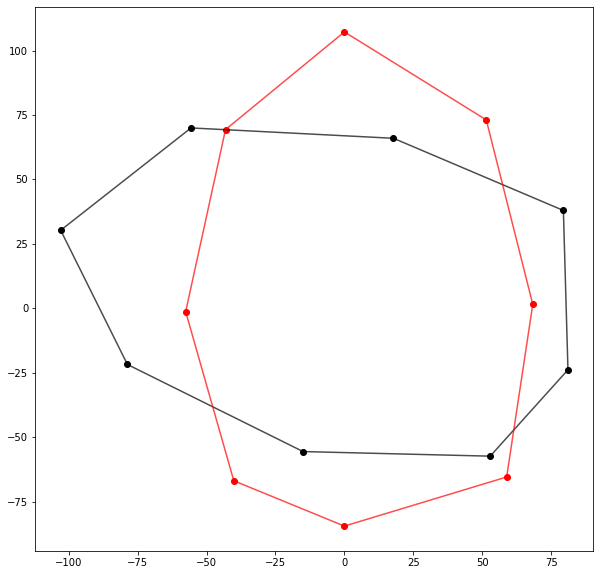

In [262]:
fig, ax  = plt.subplots(figsize=(10,10))

# not rotated
ax.scatter(coords_ctr[np.unique(inds), 0], coords_ctr[np.unique(inds), 1], c='k')
segs = coords_ctr[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
coll = LineCollection(segs, colors='k', alpha=0.7)
ax.add_collection(coll)
# Rotate
ax.scatter(coords_rot[np.unique(inds), 0], coords_rot[np.unique(inds), 1], c='r')
segs = coords_rot[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
col2 = LineCollection(segs, colors='r', alpha=0.7)
ax.add_collection(col2)

# ax.set_aspect('equal')
# ax.set_xlim(-nx/4, nx/4)
# ax.set_ylim(-ny/4, ny/4)

1.461950930224994 83.76361815711685
1.2991984341880838 74.43858702898224
1.3032402208990341 74.67016434921176
1.2380217730873444 70.93342254320773
1.2232870914336413 70.08918747198169
1.2845969073865162 73.60198116880527
1.4459915578197975 82.84921347462155
1.4517714185157176 83.18037509867132
1.4210805654540781 81.42191874858321
1.3868271479646817 79.4593424925412
1.3818100112497294 79.17188173353429
1.3795975884359948 79.04511924380884
1.3774334102037495 78.92112096498711
1.4260052285598106 81.70408116006547
1.4329041157244102 82.099358277934
1.4465047167655054 82.87861531642999
1.3976478336971894 80.07932211645131
1.0578397455697026 60.60975282233679
0.2657464546808057 15.226150273774767
0.12405917441403677 7.108067103801675
0.03330422611948969 1.9081915965961185
0.20974429549874737 12.017462909023015
0.561076847743642 32.147335358214974
0.6878305291353036 39.4097863397031
0.7408844347767796 42.44955121964498


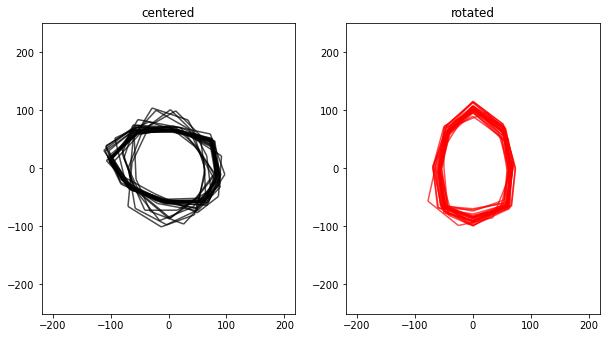

In [130]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(10,10))
ax1.set_title('centered')
ax2.set_title('rotated')
for ix in np.arange(0, 500, 20):
    R = get_2d_rotmat(ix, df_ctr, v=v)
    coords_ctr = xyp_ctr[ix, :, :] # grab first coords
    coords_rot = coords_ctr.dot(R)

    # not rotated
    #ax1.scatter(coords_ctr[np.unique(inds), 0], coords_ctr[np.unique(inds), 1], c='k')
    segs = coords_ctr[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
    coll = LineCollection(segs, colors='k', alpha=0.7)
    ax1.add_collection(coll)
    # Rotate
    #ax2.scatter(coords_rot[np.unique(inds), 0], coords_rot[np.unique(inds), 1], c='r')
    segs = coords_rot[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
    col2 = LineCollection(segs, colors='r', alpha=0.7)
    ax2.add_collection(col2)

for ax in fig.axes:
    ax.set_aspect('equal')
    ax.set_xlim(-nx/8, nx/8)
    ax.set_ylim(-ny/8, ny/8)

## apply to image

In [327]:
from PIL import Image, ImageDraw

In [328]:
# !pip install pickle5
import pickle5 as pkl

In [329]:
displaycropped=False
meta_fpath = '/Users/julianarhee/DeepLabCut/bandensis-dyad-jyr-2022-07-22/videos/NINJAV_S001_S001_T034_008_cDLC_dlcrnetms5_bandensis-dyadJul22shuffle1_50000_meta.pickle'
with open(meta_fpath, 'rb') as f:
    metadata = pkl.load(f)

In [330]:
# metadata = auxiliaryfunctions.load_video_metadata(
#     video_dir, vname, scorer)
cropping = metadata["data"]["cropping"]
cropping
[x1, x2, y1, y2] = metadata["data"]["cropping_parameters"]
print(x1, x2, y1, y2)
if displaycropped:
    ny, nx= y2-y1,x2-x1
else:
    ny, nx= clip.height(), clip.width()

927 3178 3 2153


In [331]:
print(video_fpath)
clip = vp(fname=video_fpath, fps=30)

/Users/julianarhee/DeepLabCut/bandensis-dyad-jyr-2022-07-22/videos/NINJAV_S001_S001_T034_008_c.mp4


In [332]:
im = clip.load_frame()
im = im[y1:y2, x1:x2]

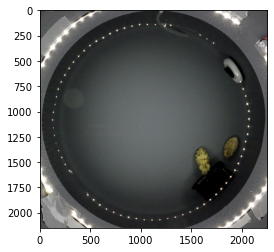

In [333]:
plt.figure()
plt.imshow(im)

In [ ]:
from shapely.geometry import MultiPoint
from shapely.geometry import Polygon

In [ ]:
np.array([[int(i[0]), int(i[1])] for i in coords[np.unique(inds)]])


In [266]:
xv = coords[:, 0]
yv = coords[:, 1]
# MultiPoint(polygon).convex_hull
p = Polygon(list(zip(xv, yv)))

NameError: name 'Polygon' is not defined

In [1]:
# MultiPoint(polygon).convex_hull
p = Polygon(list(zip(xv, yv)))

NameError: name 'MultiPoint' is not defined

In [2]:
polygon = np.array([[int(i[0]), int(i[1])] for i in coords[np.unique(inds)]])


NameError: name 'np' is not defined

In [3]:
coords[np.unique(inds)]

NameError: name 'coords' is not defined

In [4]:
plot_coords = coords[np.unique(inds)]

NameError: name 'coords' is not defined

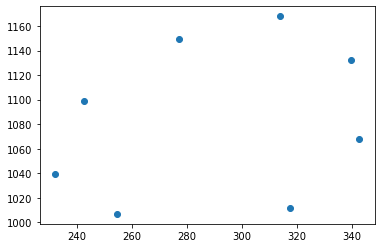

In [1278]:
plt.figure()
plt.scatter(plot_coords[:, 0], plot_coords[:, 1])

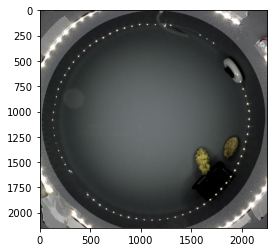

In [1266]:
#PIL_image = Image.fromarray(im.astype('uint8'), 'RGB')

#img = Image.new('L', (nx, ny), 0)
img = Image.fromarray(im)
ImageDraw.Draw(img).polygon(polygon, outline=5, fill=1)
mask = np.array(img)

plt.figure()
plt.imshow(mask)

In [1267]:
import cv2

In [1268]:
im = clip.load_frame()
im = im[y1:y2, x1:x2]
print(im.shape)
img = Image.fromarray(im)
## (1) Crop the bounding rect
rect = cv2.boundingRect(polygon)
x,y,w,h = rect
#croped = im[y:y+h, x:x+w].copy()
croped = im.copy()

## (2) make mask
#pts = polygon - polygon.min(axis=0)
pts = polygon.copy()

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)

(2150, 2251, 3)


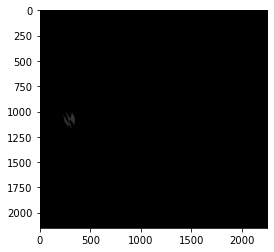

In [1269]:
plt.figure()
plt.imshow(dst)

In [1248]:
im = clip.load_frame()
#im = im[y1:y2, x1:x2]
img = Image.fromarray(np.uint8(im)*255)
# img = cv2.imread("test.png")
height = im.shape[0]
width = im.shape[1]

mask = np.zeros((height, width), dtype=np.uint8)
points = polygon.copy() #np.array([[[10,150],[150,100],[300,150],[350,100],[310,20],[35,10]]])
cv2.fillPoly(mask, points, (255))

res = cv2.bitwise_and(img,img,mask = mask)

rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2396: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


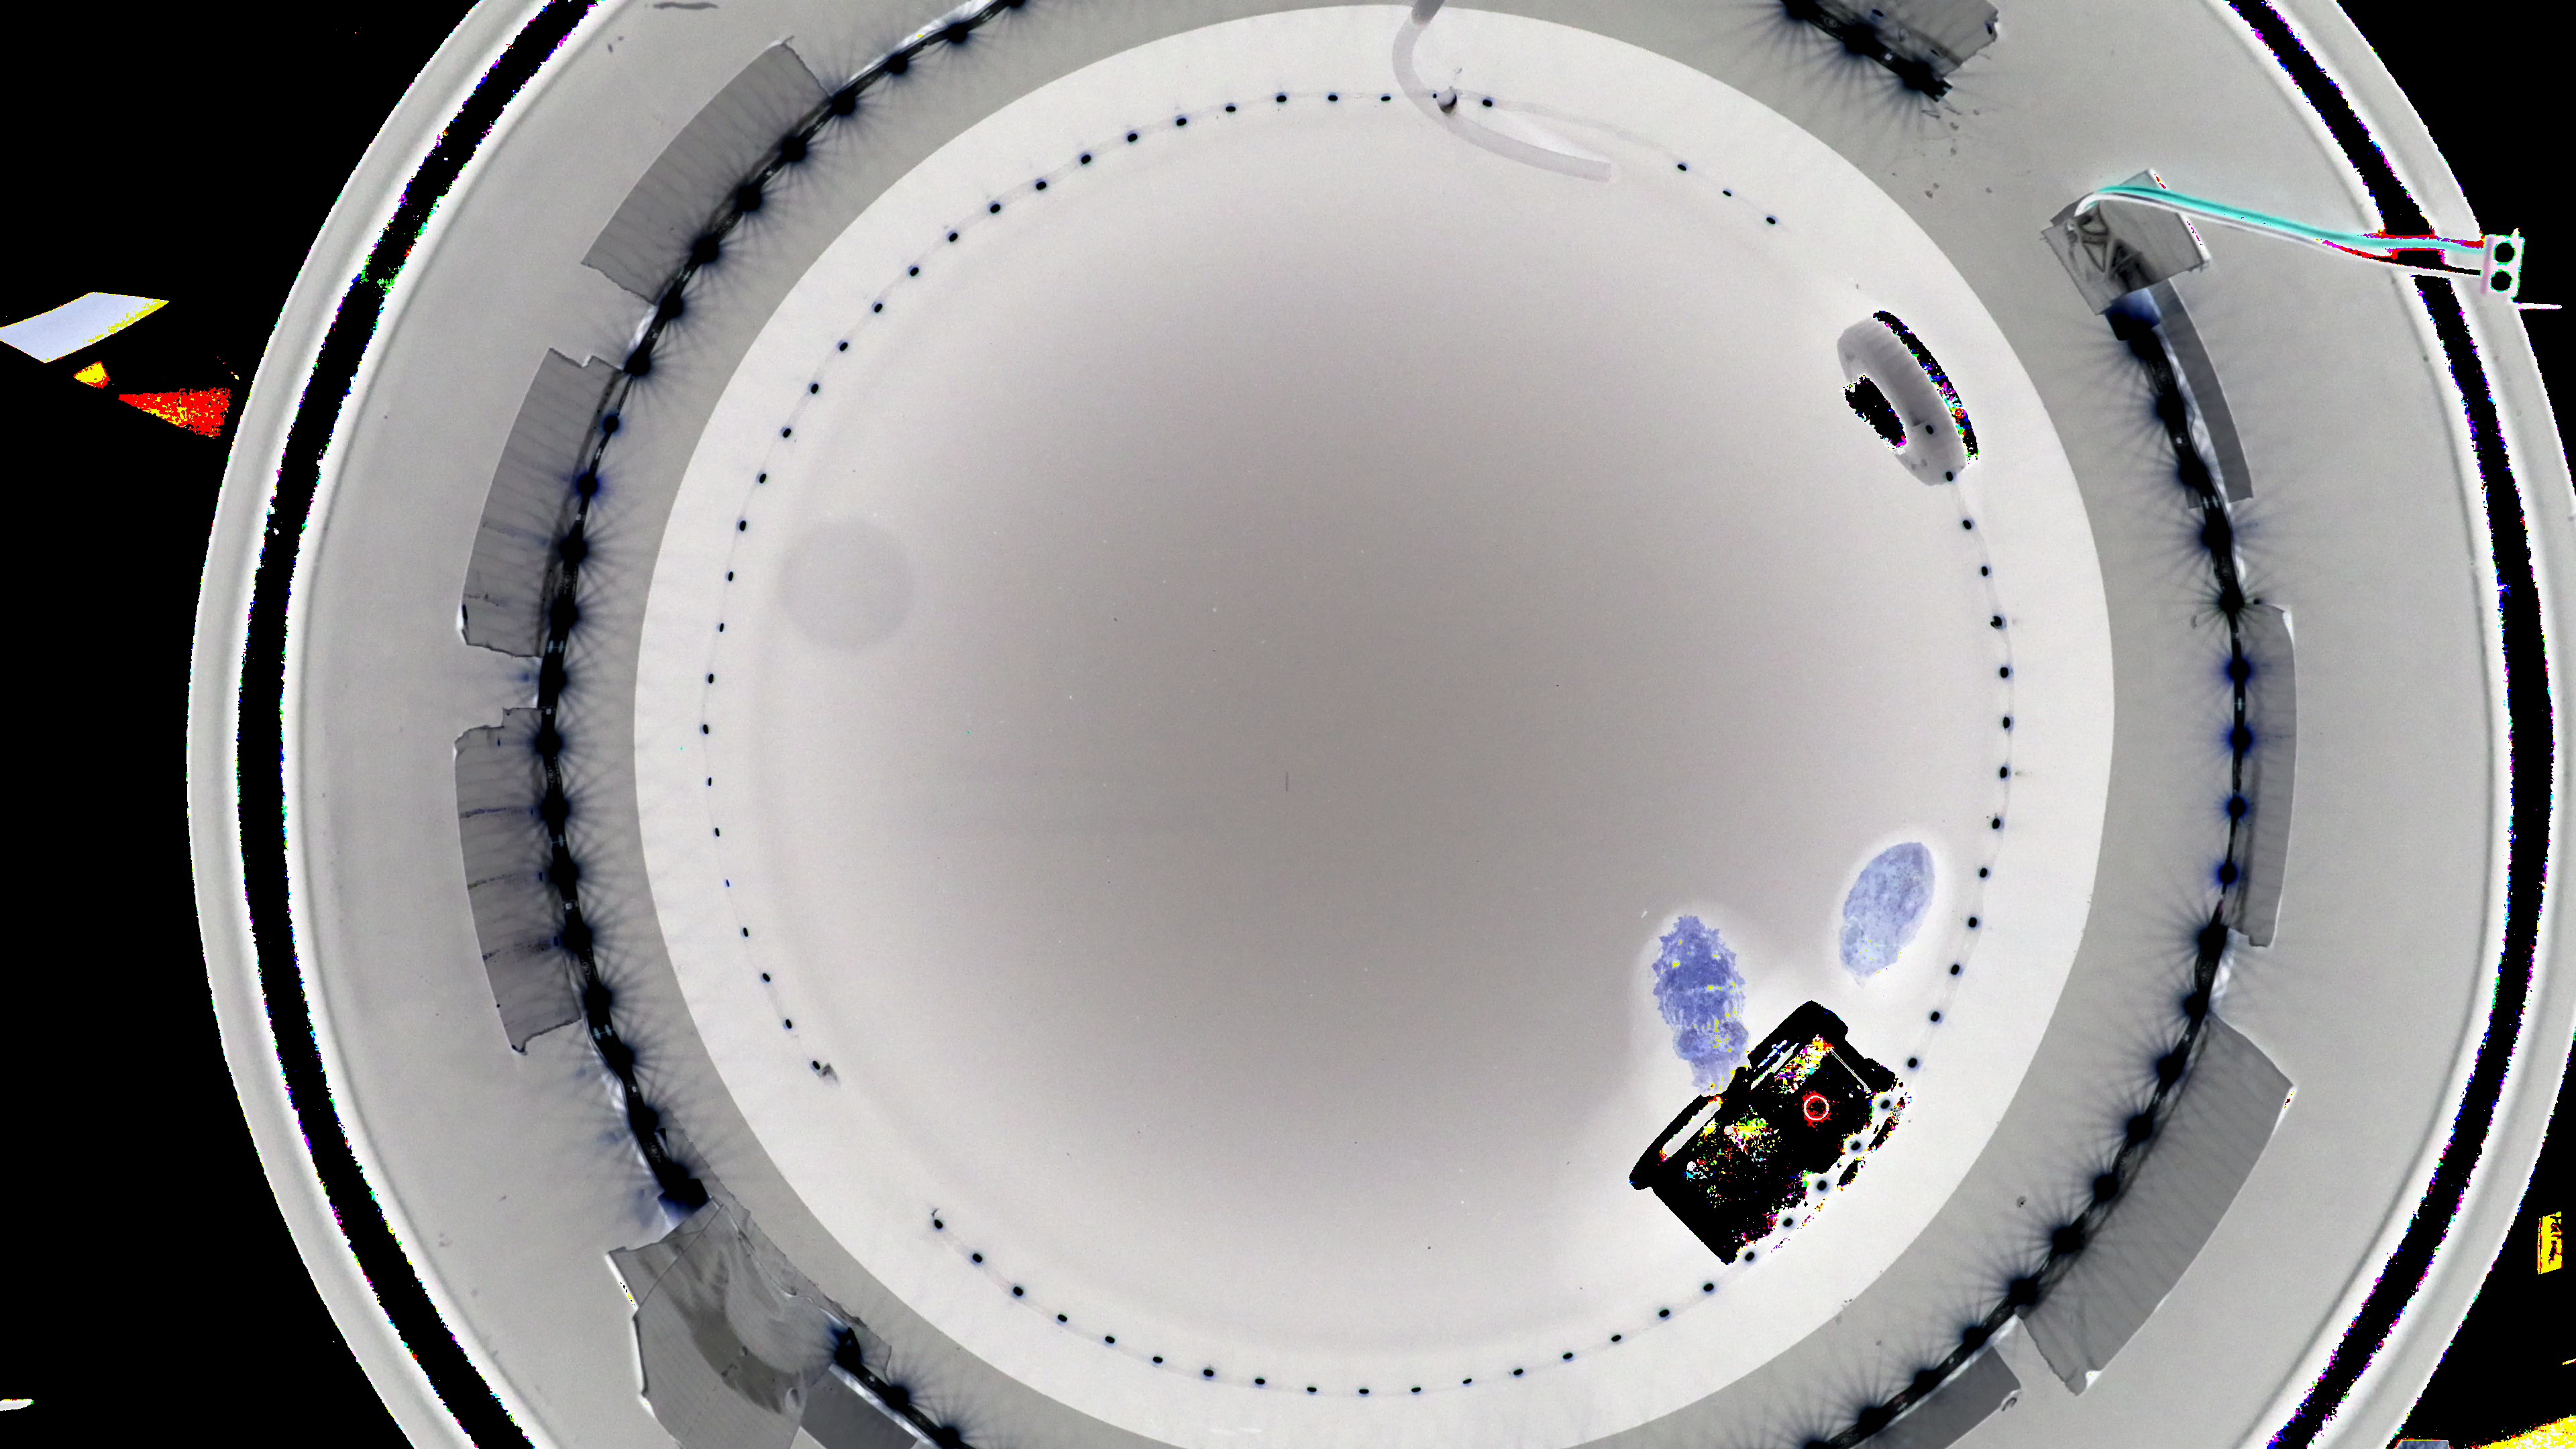

In [1253]:
img

In [1006]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def align_by_pca(m):
    pca = PCA(2)
    # This was in my first answer attempt: fit_transform works fine, but it randomly 
    # flips (mirrors) points across one of the principal axes.
    # m2 = pca.fit_transform(m)
    # ---
    # Workaround: get the rotation angle from the PCA components and manually 
    # build the rotation matrix.
    #m = coords_ctr.copy()

    # Fit the PCA object, but do not transform the data
    pca.fit(m)
    # pca.components_ : array, shape (n_components, n_features)
    ct = pca.components_[0, 0] # cos theta
    st = pca.components_[0, 1] # sin theta

    # One possible value of theta that lies in [0, pi]
    t = np.arccos(ct)

    # If t is in quadrant 1, rotate CLOCKwise by t
    if ct > 0 and st > 0:
        t *= -1
    # If t is in Q2, rotate COUNTERclockwise by the complement of theta
    elif ct < 0 and st > 0:
        t = np.pi - t
    # If t is in Q3, rotate CLOCKwise by the complement of theta
    elif ct < 0 and st < 0:
        t = -(np.pi - t)
    # If t is in Q4, rotate COUNTERclockwise by theta, i.e., do nothing
    elif ct > 0 and st < 0:
        pass

    # Manually build the ccw rotation matrix
    rotmat = np.array([[np.cos(t), -np.sin(t)], 
                       [np.sin(t),  np.cos(t)]])
    # Apply rotation to each row of m
    m2 = (rotmat @ m.T).T
    # Center the rotated point cloud at (0, 0)
    m2 -= m2.mean(axis=0)

    return m2 #, m2

In [1009]:
xyp

(1000, 22, 3)

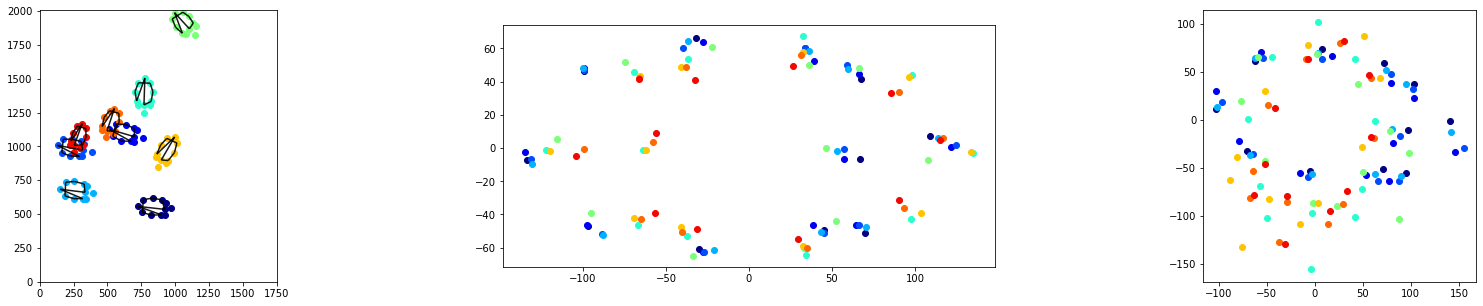

In [1013]:
plot_kws = {'alpha': 0.75,
            'edgecolor': 'white',
            'linewidths': 0.75}

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(30, 5))

start_ix, stop_ix = 0, 1000
incr = 100
cmap = plt.cm.jet(np.linspace(0, 1, len(np.arange(start_ix, stop_ix+10, incr))))
for ix, i in enumerate(np.arange(start_ix, stop_ix, incr)):
    coords = xyp[i, :, :2]
    #scat.set_offsets(coords[0:11])
    ax0.scatter(coords[0:11, 0], coords[0:11, 1], c=cmap[ix])
    ax0.set_xlim(0, nx)
    ax0.set_ylim(0, ny)
    # skeleton
    segs = coords[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
    coll = LineCollection(segs, colors='k', alpha=0.9)
    #col2 = LineCollection(segs[1:], colors=skeleton_colors[1], alpha=0.7)
    ax0.add_collection(coll)

    
    coords_ctr = xyp_ctr[i, :, :] # grab first coords
    if any(np.isnan(coords_ctr).flatten()):
        continue
    m = coords_ctr.copy()
    m2 = align_by_pca(m)

    ax2.scatter(m[:, 0], m[:, 1], c=cmap[ix]) # **plot_kws)
    ax1.scatter(m2[:, 0], m2[:, 1], c=cmap[ix]) #**plot_kws)

for ax in fig.axes:
    ax.set_aspect('equal')

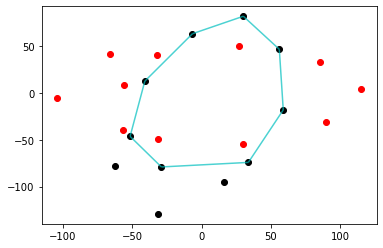

In [1016]:

m = coords_ctr.copy()
#m2 = align_by_pca(m)
# --------
theta_deg = 90
theta_rad = np.deg2rad(theta_deg)
A = np.matrix([[np.cos(theta_rad), -np.sin(theta_rad)],
               [np.sin(theta_rad), np.cos(theta_rad)]])
m2 = np.zeros(m.T.shape)

for i,v in enumerate(m.T):
  w = A @ v.T
  m2[i] = w
m2 = m2.T
# --------

fig, ax = plt.subplots()
plot_kws = {'alpha': 0.75,
            'edgecolor': 'white',
            'linewidths': 0.75}
ax.scatter(m[:, 0], m[:, 1], c='k') #**plot_kws)
ax.scatter(m2[:, 0], m2[:, 1], c='r') #**plot_kws)

segs = coords_ctr[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
coll = LineCollection(segs, colors=skeleton_colors[0], alpha=0.7)
#col2 = LineCollection(segs[1:], colors=skeleton_colors[1], alpha=0.7)
ax.add_collection(coll)

In [979]:
coords.shape, coords_ctr.shape

((22, 2), (11, 2))

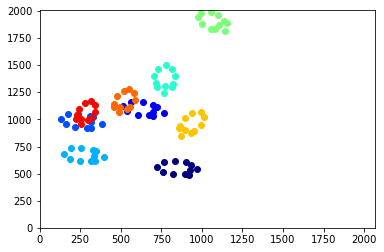

In [943]:
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
# col0 = LineCollection( uncentered_ap[::20], colors=t_cmap, alpha=0.7)
start_ix, stop_ix = 0, 1000
incr = 100
cmap = plt.cm.jet(np.linspace(0, 1, len(np.arange(start_ix, stop_ix+10, incr))))
for ix, i in enumerate(np.arange(start_ix, stop_ix, incr)):
    coords = xyp[i, :, :2]
    #scat.set_offsets(coords[0:11])
    ax.scatter(coords[0:11, 0], coords[0:11, 1], c=cmap[ix])
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

In [932]:
coords.shape

(22, 2)

In [907]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

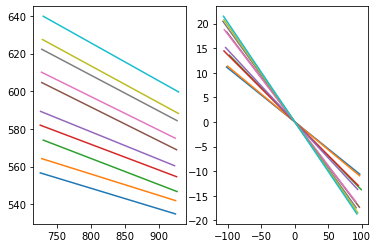

In [762]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for up, cp in zip(uncentered_ap[0:10], centered_ap[0:10]):
    ax1.plot(up[:, 0],up[:,1])
    ax2.plot(cp[:, 0], cp[:, 1])
    ax.set_aspect('equal')

In [759]:
cp

array([[  97.15844559,  -10.61721119],
       [-102.24255441,   11.17278881]])

In [ ]:

mat = rotation_matrix_from_vectors(vec1, vec2)
vec1_rot = mat.dot(vec1)
assert np.allclose(vec1_rot/np.linalg.norm(vec1_rot), vec2/np.linalg.norm(vec2))

### single line

In [493]:
cx, cy = line_intersection( (a[0], p[0]), (lt[0], rt[0]) )
print(cx, cy)

827.7475544140175 545.483211194119


In [476]:
sg_ap = np.array([a[0], p[0]])
sg_ap = np.expand_dims(sg_ap, axis=0)

sg_lr = np.array([lt[0], rt[0]])
sg_lr = np.expand_dims(sg_lr, axis=0)

print(sg_ap.shape, sg_lr.shape)


(1, 2, 2) (1, 2, 2)


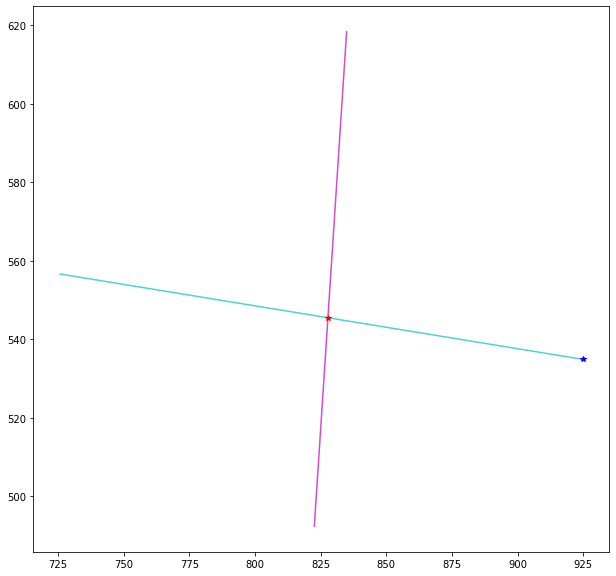

In [487]:
fig = plt.figure(frameon=False, figsize=(nx / dpi, ny / dpi))
ax = fig.add_subplot(111)
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
#scat.set_offsets(coords)

coll = LineCollection( sg_ap, colors=skeleton_colors[0], alpha=0.7)
col2 = LineCollection( sg_lr, colors=skeleton_colors[1], alpha=0.7)

ax.add_collection(coll)
ax.add_collection(col2)
#ax.set_xlim(0, nx)
#ax.set_ylim(0, ny)

ax.plot(cx, cy, 'r*')
#ax.plot(segs[b1_ix1][vec_ix][0], segs[b1_ix1][vec_ix][1], 'r*')
ax.plot( sg_ap[0][0][0], sg_ap[0][0][1], 'b*')


In [486]:
sg_ap[0]

array([[924.906, 534.866],
       [725.505, 556.656]])

In [432]:
x_ = segs[0][0][0]-cx

y_ = segs[0][0][1]-cy

x_, y_

(97.15844558598246, -10.617211194119022)

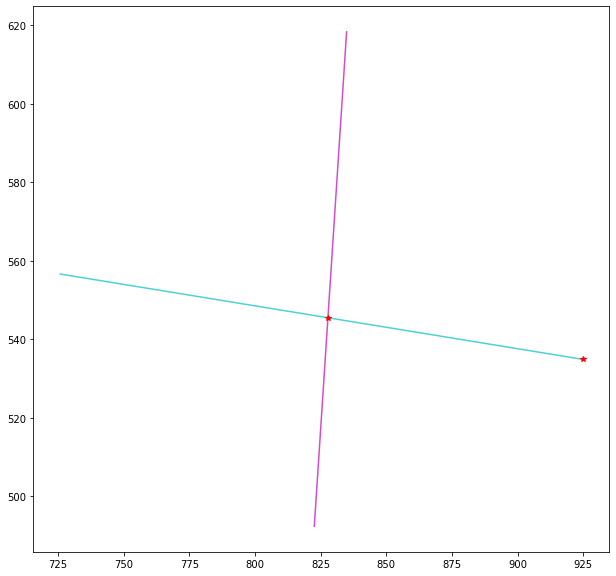

In [425]:
fig = plt.figure(frameon=False, figsize=(nx / dpi, ny / dpi))
ax = fig.add_subplot(111)
scat = ax.scatter([], [], s=keypoint_size ** 2, alpha=0.7)
#scat.set_offsets(coords)

coll = LineCollection(segs[0:1], colors=skeleton_colors[0], alpha=0.7)
col2 = LineCollection(segs[2:3], colors=skeleton_colors[1], alpha=0.7)

ax.add_collection(coll)
ax.add_collection(col2)
#ax.set_xlim(0, nx)
#ax.set_ylim(0, ny)

ax.plot(cx, cy, 'r*')
ax.plot(segs[b1_ix1][vec_ix][0], segs[b1_ix1][vec_ix][1], 'r*')


In [426]:
cx, cy

(827.7475544140175, 545.483211194119)

In [ ]:
segs

## rotation

In [ ]:
v_start = (segs[b1_ix1][vec_ix][0], segs[b1_ix1][vec_ix][1])
v_end = (cx, cy)


In [48]:
clip = vp(fname=video_fpath, fps=30)

In [ ]:
        df_likelihood = np.empty((len(bodyparts2plot),nframes))
        df_x = np.empty((len(bodyparts2plot),nframes))
        df_y = np.empty((len(bodyparts2plot),nframes))
        for bpindex, bp in enumerate(bodyparts2plot):
            df_likelihood[bpindex,:]=Dataframe[DLCscorer][bp]['likelihood'].values
            if cropping and not displaycropped:
                df_x[bpindex,:]=Dataframe[DLCscorer][bp]['x'].values+x1
                df_y[bpindex,:]=Dataframe[DLCscorer][bp]['y'].values+y1
            else:
                df_x[bpindex,:]=Dataframe[DLCscorer][bp]['x'].values
                df_y[bpindex,:]=Dataframe[DLCscorer][bp]['y'].values
        

In [ ]:
rr, cc,val = line_aa(int(np.clip(df_y[pair[0],index],0,ny-1)), \
                     int(np.clip(df_x[pair[0],index],0,nx-1)), \
                     int(np.clip(df_y[pair[1],index],1,ny-1)), \
                     int(np.clip(df_x[pair[1],index],1,nx-1)))

